In [136]:
import numpy.random as R
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import json

(shape, scale): (2.5, 5)
mean:  4.448041106946465
median:  4.312999207632455


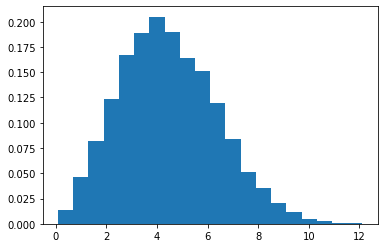

In [137]:
# shape parameter
alpha = 2.5

# scale parameter
beta = 5

# draw from unscaled Weibull distribution with shape alpha
samples = R.weibull(alpha, 10000)

# scale the distribution by beta
samples = np.multiply(samples, beta)

# view measures of center and histogram
print("(shape, scale): (%s, %s)" % (alpha, beta))
print("mean: ", np.mean(samples))
print("median: ", np.median(samples))
plt.hist(samples, 20, density=True)
plt.show()

In [138]:
def weibull(x, alpha, beta):
     return (alpha / beta) * (x / beta)**(alpha - 1) * np.exp(-(x / beta)**alpha)

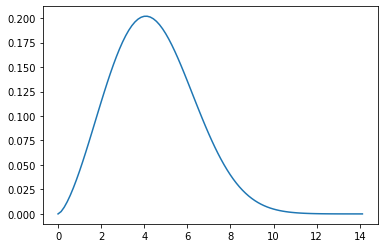

In [139]:
# visualize density

x = np.linspace(0,np.max(samples)+2, 100)
plt.plot(x, weibull(x, alpha, beta))
plt.show()

In [140]:
# test box

# a = [1, 2, 3]
# np.multiply(a, 3)

In [154]:
# functions for tuning Weibull distribution parameters to yield a given mean

def weibullMeans(alphaRange, betaRange):
    '''
    computes expected value for each pair of 
    (alpha, beta) in the cross-product of arrays alphaRange and betaRange
    '''
    results = []
    for alpha in alphaRange:
        for beta in betaRange:
            samples = R.weibull(alpha, 10000)
            samples = np.multiply(samples, beta)
            mu = np.mean(samples)
            results.append(((alpha, beta), mu))
    return results

def filterMeans(means, target, margin):
    out = []
    for mean in means:
        if abs(mean[1] - target) < margin:
            out.append(mean)
    return out

def getClosest(means, target):
    minErr = 100
    out = ()
    for mean in means:
        err = abs(mean[1] - target)
        if err < minErr:
            minErr = err
            out = mean
    return out

def tuneParams(target):
    alphaRange = np.linspace(1,4,50)
    betaRange = np.linspace(3,12,50)
    
    unfiltered = weibullMeans(alphaRange, betaRange)
    params = getClosest(unfiltered, target)
    
    return params

def tuneToTargets(targets):
    out = []
    for target in targets:
        tuned = tuneParams(target)
        r = {
            "target": target,
            "approx": tuned[1],
            "error": abs(target-tuned[1]),
            "alpha": tuned[0][0],
            "beta": tuned[0][1]
        }
        out.append(r)
    return out

In [155]:
# tune a Weibull distribution for each target mean

targets = [4.6, 4, 8, 6, 10]
tunedParams = tuneToTargets(targets)

In [159]:
# look at those beautifully tuned parameters

# HERE! annotate this, make it look nicer, so I know what I'm actually approximating here

print(json.dumps(tunedParams, indent=4))

[
    {
        "target": 4.6,
        "approx": 4.602861878706434,
        "error": 0.0028618787064340623,
        "alpha": 1.4285714285714286,
        "beta": 5.020408163265307
    },
    {
        "target": 4,
        "approx": 3.99857367511919,
        "error": 0.0014263248808101814,
        "alpha": 1.183673469387755,
        "beta": 4.285714285714286
    },
    {
        "target": 8,
        "approx": 7.998692149329932,
        "error": 0.0013078506700683334,
        "alpha": 1.8571428571428572,
        "beta": 9.061224489795919
    },
    {
        "target": 6,
        "approx": 5.99729509958473,
        "error": 0.0027049004152699396,
        "alpha": 1.306122448979592,
        "beta": 6.4897959183673475
    },
    {
        "target": 10,
        "approx": 10.001797341160152,
        "error": 0.0017973411601523992,
        "alpha": 3.693877551020408,
        "beta": 11.081632653061225
    }
]
